In [1]:
import numpy as np
from PIL import Image
import PIL
import os
import cv2 as cv

BACKGROUND_DIR = os.getcwd() + "/Backgrounds/"
DIR = os.getcwd() + "/Icons/"

### Icon

Run this document when you want to add new icons and process them. A few things to keep in mind: 
1. Make sure the picture you have taken, has the icon somewhat centered. It makes things easier. 
2. Adjust the processed image, by ysing the 5 parameters left, right, up, down and margin. 
3. Be careful not to overwrite old images, by forgetting to change the filename. 

In [2]:
def white_to_transparency(img):
    image_array = np.asarray(img.convert('RGBA')).copy() 
    HEIGHT = np.shape(image_array)[0]
    INFLECTION_POINT = int(np.sum(image_array[0,:,0]) / HEIGHT) - 10
    INFLECTION_POINT = 100
    image_array[image_array > INFLECTION_POINT] = 255
    image_array[image_array < INFLECTION_POINT] = 0
    image_array[:, :, 3] = (255 * (image_array[:, :, :3] != 255).any(axis=2)).astype(np.uint8)
    return Image.fromarray(image_array)

def extract_icon(image_array, LOCATION, MARGIN):
    HEIGHT, WIDTH = np.shape(image_array)
    """
    up, down = LOCATION[0]
    left, right = LOCATION[1]
    
    offset_x, offset_y = LOCATION
    
    newimgarr = image_array[int(HEIGHT/2) - MARGIN - up:int(HEIGHT/2) + MARGIN + down,
                            int(WIDTH/2) - MARGIN + left:int(WIDTH/2) + MARGIN + right]
    """
    return Image.fromarray(newimgarr).resize((40, 40))



def get_mask(FILENAME):
    img = cv.imread(DIR + FILENAME,0)
    #print(img)
    #_, th1 = cv.threshold(img,100,0,cv.THRESH_BINARY_INV)
    #print(th1)
    img[img < 10] = 1  
    img[img == 255] = 0 
    
    return th1


def save_mask(FILENAME):
    mask = get_mask("mask_" + FILENAME)
    x_vals = mask[:, 0]
    y_vals = mask[:, 1]
    FILENAME = FILENAME.split(".")[0]
    np.savez(FILENAME + '_mask.npz', x=x_vals, y=y_vals)

In [22]:
FILENAME = "R/R3.png"


img = Image.open(DIR + FILENAME).convert("L")

imgarr = np.array(img)

UP = 160
DOWN = 80
LEFT = -140
RIGHT = 140
MARGIN = 50

#icon_image = extract_icon(imgarr, [(UP, DOWN), (LEFT, RIGHT)], MARGIN)

icon_image = Image.fromarray(imgarr).resize((40, 40))

#icon_image.show()
#th1 = get_mask(FILENAME)
#img = Image.fromarray(th1)
#img.show()
#print(np.sum(get_mask(FILENAME)))
icon_image.save(DIR + "/" + FILENAME)

### Save Icon
Only run this when you need to save the icon image

### Resize Backgrounds

Resizes the backgrounds to (900, 1200) and makes sure the image is in landscape orientation. Only input is the filename. 

In [90]:
FILENAME = 'background8.png'
TARGET_WIDTH, TARGET_HEIGHT = (900, 1200)

In [91]:
image = Image.open(BACKGROUND_DIR + FILENAME).convert("L")
imgarr = np.array(image)
HEIGHT, WIDTH = np.shape(imgarr)
if WIDTH > HEIGHT:
    imgarr = imgarr.T
Image.fromarray(imgarr)
image = image.resize((TARGET_WIDTH, TARGET_HEIGHT), Image.ANTIALIAS)
image.show()

### Save Background

In [92]:
image.save(BACKGROUND_DIR + "/" + FILENAME)

### Project: Better results

In [78]:
import matplotlib.pyplot as plt

In [122]:
import cv2 as cv
FILENAME = "D4.png"

In [123]:
img = cv.imread(DIR + FILENAME,0)

In [124]:
img

array([[167, 168, 167, ..., 165, 165, 165],
       [168, 169, 167, ..., 165, 165, 164],
       [169, 167, 167, ..., 165, 165, 166],
       ...,
       [142, 141, 140, ..., 162, 159, 162],
       [142, 141, 141, ..., 159, 162, 162],
       [141, 142, 142, ..., 161, 161, 161]], dtype=uint8)

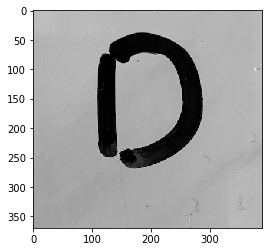

In [125]:
plt.imshow(img,'gray')

In [201]:
ret,th1 = cv.threshold(img,100,255,cv.THRESH_BINARY_INV)

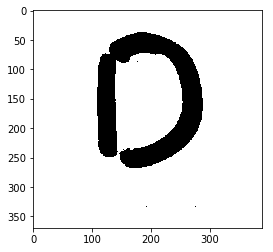

In [146]:
plt.imshow(-1 * th1,'gray')

In [150]:
th1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [202]:
a, b = cv.findContours(th1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [204]:
a[4]

array([[[177,  38]],

       [[176,  39]],

       [[171,  39]],

       [[170,  40]],

       [[168,  40]],

       [[167,  41]],

       [[164,  41]],

       [[163,  42]],

       [[161,  42]],

       [[160,  43]],

       [[158,  43]],

       [[157,  44]],

       [[156,  44]],

       [[155,  45]],

       [[153,  45]],

       [[152,  46]],

       [[151,  46]],

       [[150,  47]],

       [[149,  47]],

       [[148,  48]],

       [[147,  48]],

       [[146,  49]],

       [[145,  49]],

       [[144,  50]],

       [[143,  50]],

       [[142,  51]],

       [[141,  51]],

       [[140,  52]],

       [[139,  52]],

       [[138,  53]],

       [[137,  53]],

       [[135,  55]],

       [[134,  55]],

       [[132,  57]],

       [[131,  57]],

       [[131,  58]],

       [[130,  59]],

       [[130,  62]],

       [[129,  63]],

       [[129,  71]],

       [[130,  72]],

       [[130,  74]],

       [[129,  75]],

       [[128,  74]],

       [[123,  74]],

       [[1

In [199]:
cv.drawContours(th1, a[3], -1, (0,255,0), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

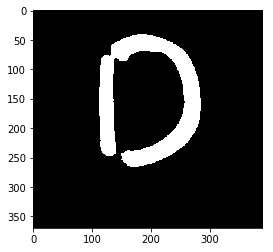

In [200]:
plt.imshow(th2,'gray')

Steps should be: 
* Find background image 
* Select icon 
* Select icon mask file 
* Insert icon on background 
* Use that position to alter the mask location
* Insert the mask location into the via_regions file. 